```python

# Upload Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn


In [2]:
ddf = pd.read_csv("\credit_customers.csv")
pd.set_option('display.max_column',21)
df= ddf.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

# Data Exploration

In [4]:
ff=pd.get_dummies(df.drop("class",axis=1))

In [5]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
good_data = df[df["class"]=='good']
bad_data = df[df["class"]=="bad"]

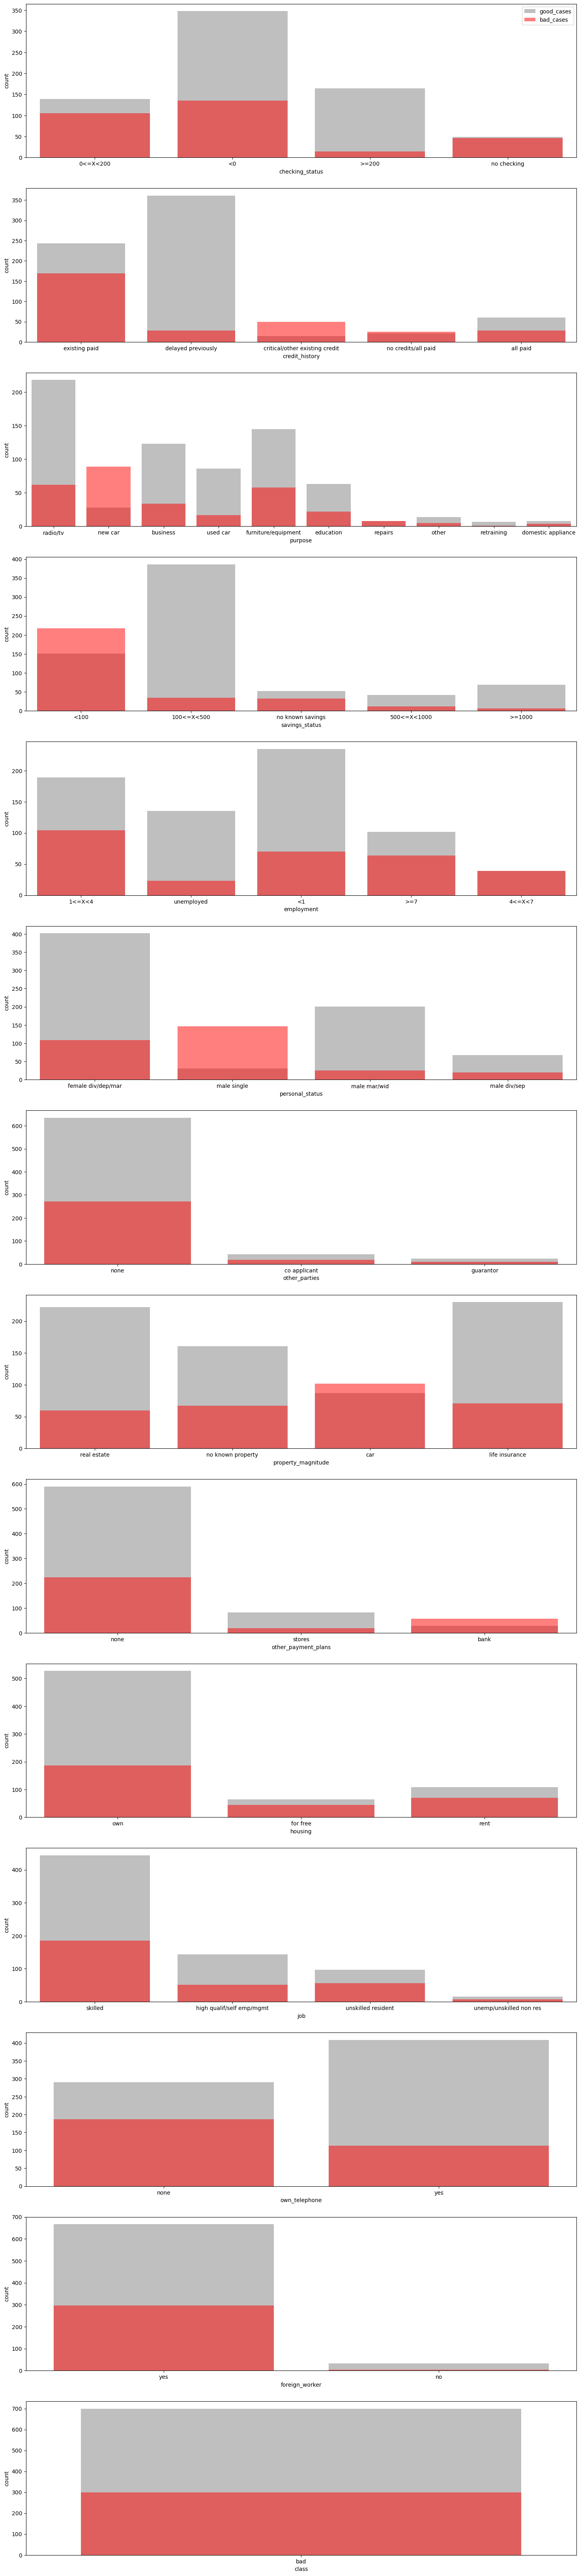

In [7]:
categorical_features = df.select_dtypes('object').columns
n=len(categorical_features)
fig , axes = plt.subplots(14,1,figsize=(18,84))
for ax,feature in zip(axes.ravel(),categorical_features):
        sns.countplot(data=good_data,x=feature,ax=ax,alpha=0.5,color='grey',saturation=1,label="good_cases")
        sns.countplot(data=bad_data,x=feature,ax=ax,alpha=0.5,color='r',saturation=1,label="bad_cases")
axes.ravel()[0].legend(loc="best")

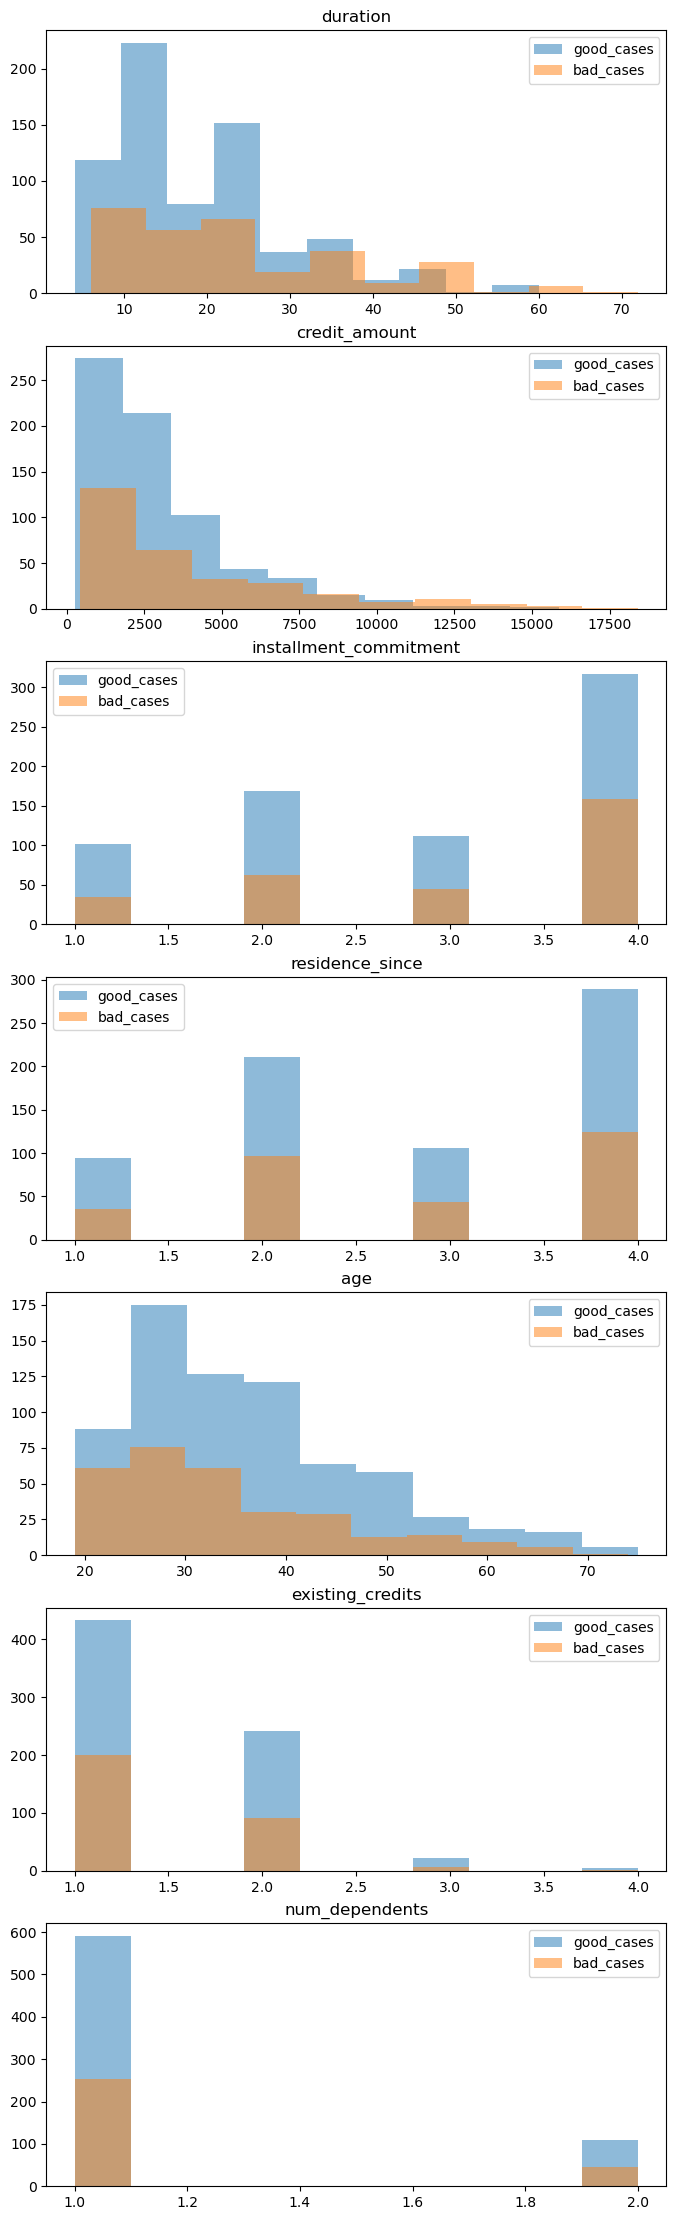

In [8]:
numerical_features = df.select_dtypes('float64').columns
fig , axes =plt.subplots(7,1,figsize=(8,28))
for var,ax in zip(numerical_features,axes.ravel()):
     ax.hist(good_data[var],alpha=0.5)
     ax.hist(bad_data[var],alpha=0.5)
     ax.set_title(var)
     ax.legend(['good_cases','bad_cases'],loc='best')

<AxesSubplot:>

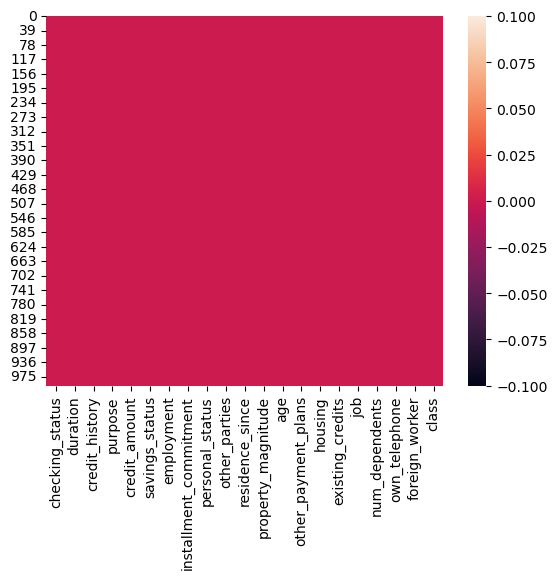

In [9]:
display(sns.heatmap(df.isna()))

In [10]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

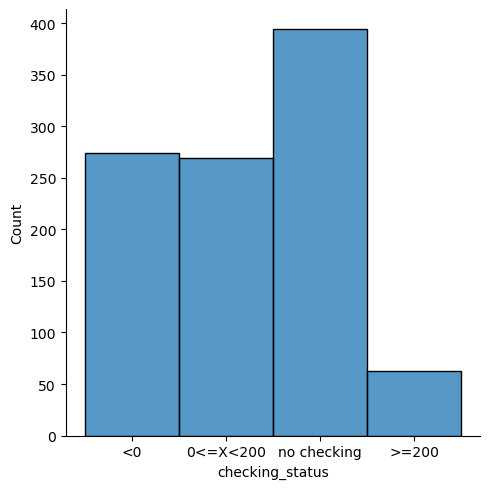

In [11]:
df.checking_status.unique()
df.checking_status.value_counts()
df.checking_status.isna().unique()
sns.displot(df.checking_status)

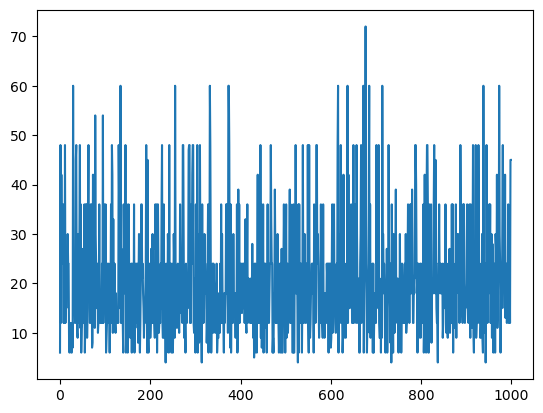

In [12]:
#duration
list= np.arange(1000)
plt.figure()
plt.plot(list,df["duration"])
plt.show()

In [13]:
#plt.figure(figsize=(10,10))
#sns.heatmap(df.isna())

In [14]:
#credit_history
df.credit_history.value_counts()

existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64

In [15]:
x = df.copy()

In [16]:
code = {"existing paid":"good","critical/other existing credit":"bad","delayed previously":"bad","all paid":"good","no credits/all paid":"good"}

In [17]:
x.loc[:,"credit_history"] = x["credit_history"].map(code)

In [18]:
l= np.sum(x["credit_history"]==x["class"])/1000
print(l)

0.475


In [19]:
#with only this new generated feature we could explain 47% of the target

In [20]:
#purpose
df["purpose"].unique()

array(['radio/tv', 'education', 'furniture/equipment', 'new car',
       'used car', 'business', 'domestic appliance', 'repairs', 'other',
       'retraining'], dtype=object)

In [21]:
#savings_status
df["savings_status"].unique()
df["savings_status"].value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

In [22]:
#'employment'
df["employment"].unique()
df["employment"].value_counts()


1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64

In [23]:
df["class"].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [24]:
# "employment" alone could explain 65% of all cases
x=df.copy()
code1={"1<=X<4":"good",">=7":"good","4<=X<7":"good","<1":"bad","unemployed":"bad"}
x.loc[:,"employment"] = x["employment"].map(code1)
print(sum(x["employment"]==x["class"])/1000)


0.652


In [25]:
#personal status
len(df["personal_status"].value_counts())

4

In [26]:
x=df.copy()
code2={"male single":"good","male mar/wid":"good","male div/sep":"good","female div/dep/mar":"bad"}
x.loc[:,"personal_status"] = x["personal_status"].map(code2)
print(sum(x["personal_status"]==x["class"])/1000)

0.608


In [27]:
df['housing'].value_counts()

own         713
rent        179
for free    108
Name: housing, dtype: int64

In [28]:
#housing
df['housing'].value_counts()
x=df.copy()
code3={"own":"good","rent":"bad","for free":"good"}
x.loc[:,"housing"] = x["housing"].map(code3)
print(sum(x["housing"]==x["class"])/1000)


0.661


In [29]:
df["class"].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [30]:
df["job"].value_counts()

skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: job, dtype: int64

In [31]:
x=df.copy()
code4={"skilled":"good","high qualif/self emp/mgmt":"good","unskilled resident":"bad","unemp/unskilled non res":"bad"}
x.loc[:,"job"] = x["job"].map(code4)
print(sum(x["job"]==x["class"])/1000)

0.604


In [32]:
df['num_dependents'].value_counts()

1.0    845
2.0    155
Name: num_dependents, dtype: int64

In [33]:
df['foreign_worker'].value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

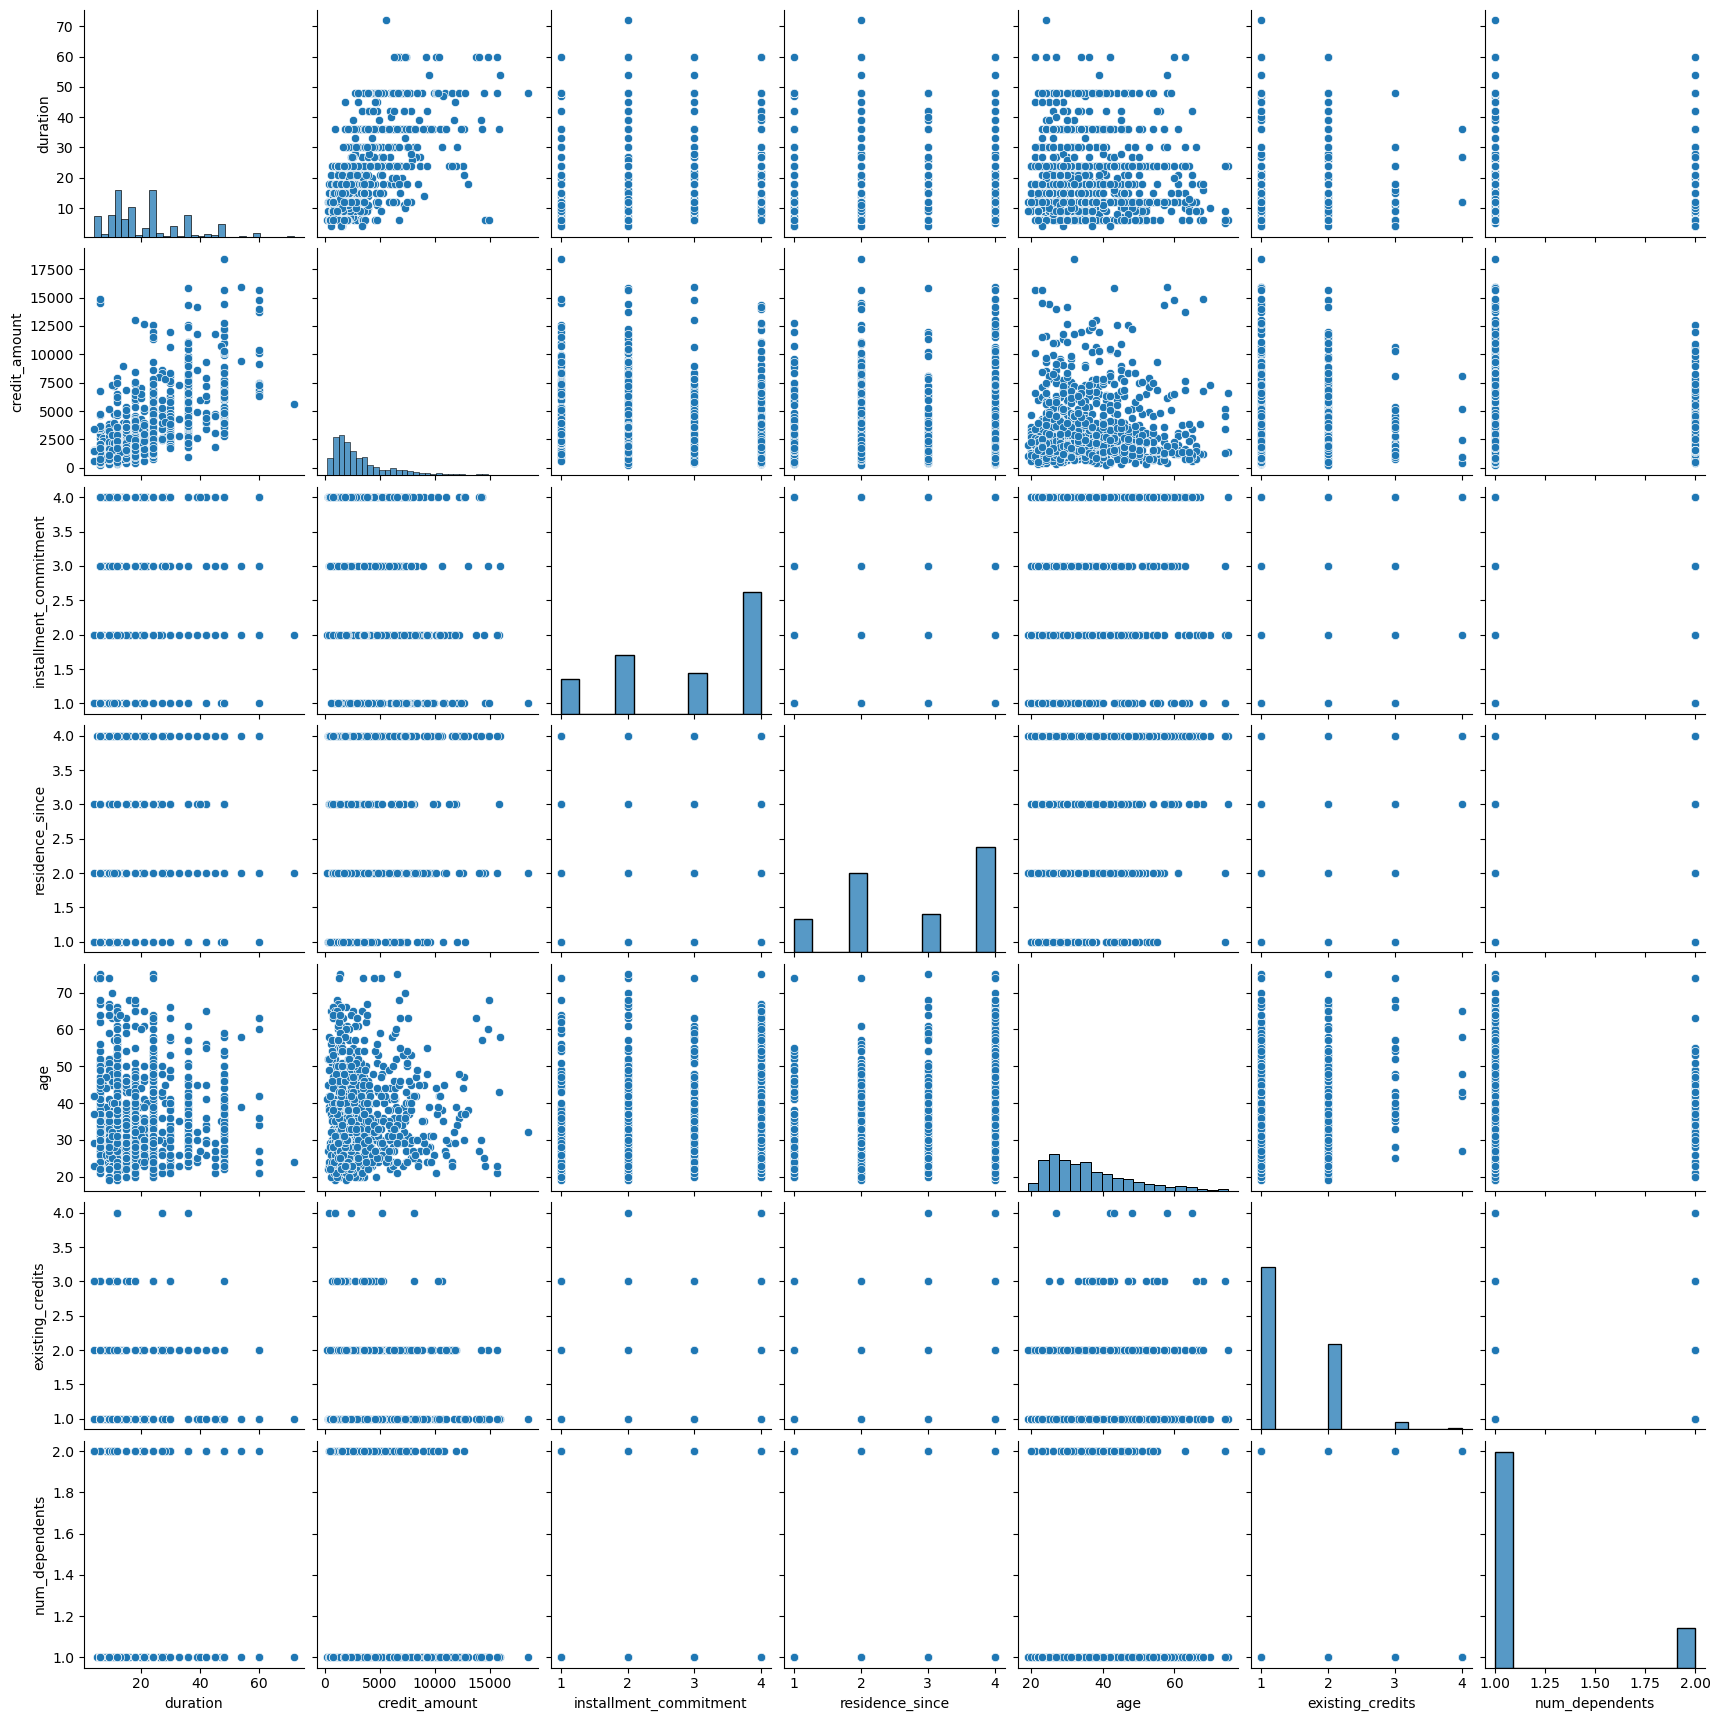

In [34]:
sns.pairplot(df[numerical_features])

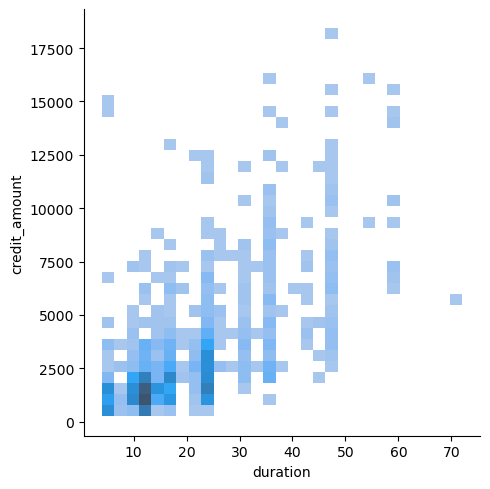

In [35]:
sns.displot(df[numerical_features],x='duration',y='credit_amount')
# We notice a positive correlation (0.62)! seems to be logical because generally credits of high amounts are taken for long durations

In [36]:
np.var(df[numerical_features])

duration                  1.452696e+02
credit_amount             7.959876e+06
installment_commitment    1.250271e+00
residence_since           1.216975e+00
age                       1.292719e+02
existing_credits          3.333510e-01
num_dependents            1.309750e-01
dtype: float64

In [37]:
df[numerical_features].corr()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_commitment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
residence_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


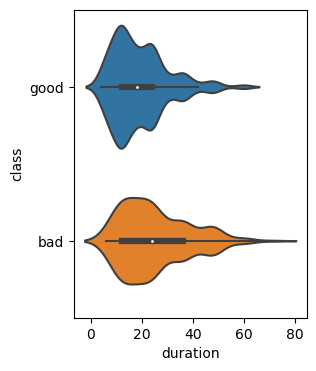

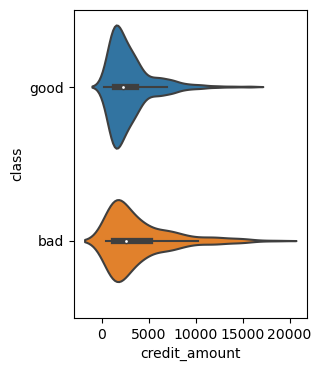

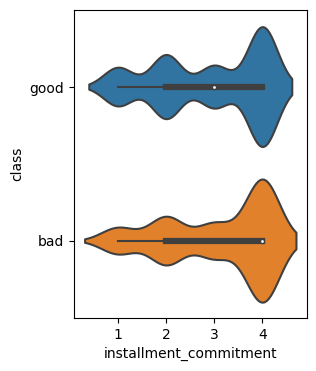

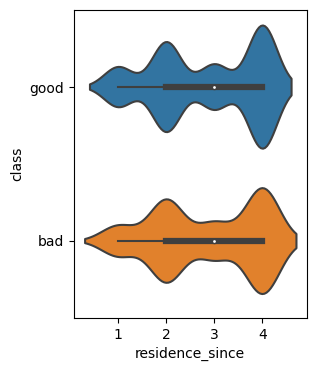

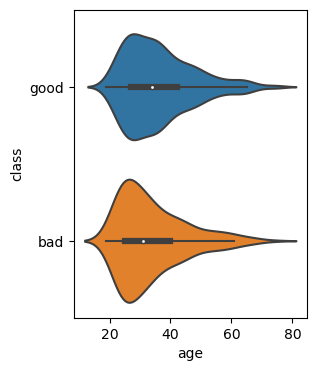

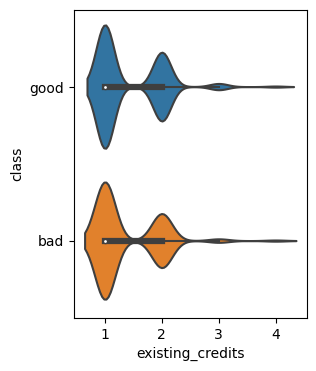

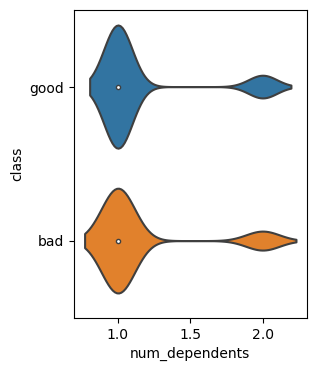

In [38]:
for column in numerical_features:
    plt.figure(figsize=(3,4))
    sns.violinplot(data=df[numerical_features],x=column,y=df["class"])


In [39]:
#for column in categorical_features:
#    plt.figure(figsize=(7,3))
#    sns.countplot(data=df[categorical_features],x=column)

# Preprocessing

In [40]:
from sklearn.preprocessing import LabelEncoder
code={"good":1,"bad":0}
df.loc[:,"class"] = x["class"].map(code)
target = df["class"]
data = df.drop("class",axis=1)
enc= LabelEncoder()
liste = categorical_features.drop("class")
for col in liste: 
    data[col]= enc.fit_transform(data[col])
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,4.0,3,67.0,1,1,2.0,1,1.0,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,2.0,3,22.0,1,1,1.0,1,1.0,0,1
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,3.0,3,49.0,1,1,1.0,3,2.0,0,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,4.0,1,45.0,1,0,1.0,1,2.0,0,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,4.0,2,53.0,1,0,2.0,1,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,3,3,1736.0,2,1,3.0,0,2,4.0,3,31.0,1,1,1.0,3,1.0,0,1
996,1,30.0,3,9,3857.0,2,0,4.0,1,2,4.0,1,40.0,1,1,1.0,0,1.0,1,1
997,3,12.0,3,6,804.0,2,3,4.0,3,2,4.0,0,38.0,1,1,1.0,1,1.0,0,1
998,1,45.0,3,6,1845.0,2,0,4.0,3,2,4.0,2,23.0,1,0,1.0,1,1.0,1,1


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(data,target,random_state=0)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)
list_impo = tree.feature_importances_
np.median(list_impo,0)
features = data.columns
important_features = [features[i] for i in range(len(features)) if list_impo[i] >= np.median(list_impo,0)]
important_data  = data[important_features]
important_data

,checking_status,duration,purpose,credit_amount,employment,installment_commitment,residence_since,property_magnitude,age,existing_credits
0,1,6.0,6,1169.0,3,4.0,4.0,3,67.0,2.0
1,0,48.0,6,5951.0,0,2.0,2.0,3,22.0,1.0
2,3,12.0,2,2096.0,1,2.0,3.0,3,49.0,1.0
3,1,42.0,3,7882.0,1,2.0,4.0,1,45.0,1.0
4,1,24.0,4,4870.0,0,3.0,4.0,2,53.0,2.0
...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,3,1736.0,1,3.0,4.0,3,31.0,1.0
996,1,30.0,9,3857.0,0,4.0,4.0,1,40.0,1.0
997,3,12.0,6,804.0,3,4.0,4.0,0,38.0,1.0
998,1,45.0,6,1845.0,0,4.0,4.0,2,23.0,1.0


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(important_data)
data_preprocessed = data_scaled

# Splitting the data and Modeling

In [43]:
x_train,x_test,y_train,y_test=train_test_split(data_preprocessed,target,random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression ,Ridge
lr = LinearRegression().fit(x_train,y_train)
rr = Ridge(alpha=1).fit(x_train,y_train)

In [45]:
print(f'the score of the linear regression is.{lr.score(x_test,y_test)}')

the score of the linear regression is.0.11655891183277278


In [46]:
print(f'the score of the Ridge regression is.{rr.score(x_test,y_test)}')

the score of the Ridge regression is.0.1166426202280495


In [47]:
x_traind,x_testd,y_traind,y_testd=train_test_split(ff,target,random_state=0)
lr = LinearRegression().fit(x_traind,y_traind)
rr = Ridge(alpha=1).fit(x_traind,y_traind)

In [48]:
print(f'the score of the Ridge regression is.{rr.score(x_testd,y_testd)}')

the score of the Ridge regression is.0.08171600014734681


In [49]:
print(f'the score of the linear regression is.{lr.score(x_testd,y_testd)}')

the score of the linear regression is.0.0760406801330239


In [50]:
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier,GradientBoostingClassifier
rfc = RandomForestClassifier(random_state=0).fit(x_train,y_train)
ada= AdaBoostClassifier(random_state=0).fit(x_train,y_train)
gbc= GradientBoostingClassifier(random_state=0).fit(x_train,y_train)

In [51]:
print(f'the score of the RandomForestClassifier is.{rfc.score(x_test,y_test)}')
print(f'the score of the adaboost is.{ada.score(x_test,y_test)}')
print(f'the score of the Gradientboostingclassifier is.{gbc.score(x_test,y_test)}')

the score of the RandomForestClassifier is.0.732
the score of the adaboost is.0.74
the score of the Gradientboostingclassifier is.0.74


In [52]:
rfc = RandomForestClassifier(random_state=0).fit(x_traind,y_traind)
ada= AdaBoostClassifier(random_state=0).fit(x_traind,y_traind)
gbc= GradientBoostingClassifier(random_state=0).fit(x_traind,y_traind)
print(f'the score of the RandomForestClassifier is.{rfc.score(x_testd,y_testd)}')
print(f'the score of the adaboost is.{ada.score(x_testd,y_testd)}')
print(f'the score of the Gradientboostingclassifier is.{gbc.score(x_testd,y_testd)}')

the score of the RandomForestClassifier is.0.78
the score of the adaboost is.0.76
the score of the Gradientboostingclassifier is.0.776


In [53]:
from sklearn.neural_network import MLPClassifier
rn= MLPClassifier(random_state=0,solver='sgd',hidden_layer_sizes=(100,10)).fit(x_traind,y_traind).score(x_testd,y_testd)
rn

0.704

In [54]:
grid_param = {'n_estimators':np.arange(120,160)}

In [55]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(RandomForestClassifier(),grid_param).fit(ff,target)
gridsearch

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159])})

In [56]:
gridsearch.best_score_

0.773

In [57]:
gridsearch.best_params_

{'n_estimators': 150}